# analyzing capture statistics of particle trajectories
Tim Tyree<br>
1.10.2024

In [1]:
from lib.my_initialization import *
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

# define module

In [26]:
# !ls -lstr /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results
def process_particle_log_min_range_timeseries(dirname,threshR,icol='pid_explicit',**kwargs):
    """
    Example Usage:
minR_lst_lst = process_particle_log_min_range_timeseries(dirname,threshR,icol='pid_explicit')#,**kwargs)
    """
    df=pd.read_csv(dirname)
    width,height=np.around(df.describe().loc['max'][['x','y']].values.T,3)
    DT=df['t'].tail(3).diff().iloc[1]
    distance_L2_pbc = get_distance_L2_pbc(width=width, height=height)
    minR_lst_lst=[]
    pid_values_self = df[icol].drop_duplicates().values
    for index_self in pid_values_self:
        t=df.loc[(df[icol]==index_self),['t']].max().values[0]
        minR=9e9
        xy_self=df.loc[(df['t']==t)&(df[icol]==index_self),['x','y']].values
        pid_values = df[df['t']==t][icol].drop_duplicates().values
        for index_other in np.setdiff1d(pid_values,[index_self]):
            xy_other=df.loc[(df['t']==t)&(df[icol]==index_other),['x','y']].values
    #         print(f"{xy_other.shape=}")
            dist=distance_L2_pbc(xy_self[0],xy_other[0])
            if minR>dist:
                minR=dist
    #     print ( f"- {index_self=}, {t=}, {minR=}")

        if threshR>minR:
            #stop condition
        #     tnext=df.loc[df['t']>t,'t'].min()
            tnext=df.loc[df['t']<t,'t'].max()
            boo=(df['t']==tnext)&(df[icol]==index_self)
            if not boo.any():
                index_self=-1

            minR_lst=[]
            minR_lst.append(minR)
        #     dur=float(DT)
            while index_self!=-1:
        #         tnext=df.loc[df['t']>t,'t'].min()
                tnext=df.loc[df['t']<t,'t'].max()
                #stop condition
                boo=(df['t']==tnext)&(df[icol]==index_self)
                if not boo.any():
                    index_self=-1
                else:
                    t=tnext
                    minR=9e9
                    xy_self=df.loc[(df['t']==t)&(df[icol]==index_self),['x','y']].values
                    for index_other in np.setdiff1d(pid_values,[index_self]):
                        xy_other=df.loc[(df['t']==t)&(df[icol]==index_other),['x','y']].values
                        dist=distance_L2_pbc(xy_self[0],xy_other[0])
                        if minR>dist:
                            minR=dist
                    minR_lst.append(minR)
            minR_lst_lst.append(minR_lst)
    return minR_lst_lst

# generate LPM particle trajectories fit to the full models

In [80]:
# DX=0.025
DX=1.
# mindur=100 #ms

#   FK          LR
# r 0.457±0.009 0.314±0.003
# r=0.1 #cm
# r=0.25 #cm
# r = 0.457#±0.009 cm #FK
r = 0.314#±0.003 cm #LR
threshR=r/DX
# print(f"{threshR=:.4} pixels")

In [134]:
save_folder = "/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results"
#FK
folder = f"{save_folder}/neighbors_False_uniformic_0_fc_2_r_0.457_D_0.115_L_5_kappa_15_varkappa_1.552_N_8/Log"
#LR
folder = f"{save_folder}/neighbors_False_uniformic_0_fc_2_r_0.314_D_0.42_L_5_kappa_75_varkappa_9.3_N_4/Log"
#dev
# folder = f"{save_folder}/neighbors_False_uniformic_0_fc_2_r_0.1_D_0.3_L_10_kappa_1500_varkappa_0.6_N_2/Log"
task_lst=[]
for fn in os.listdir(folder):
    pass
    dirname=os.path.join(folder,fn)
    task=dirname,threshR
    task_lst.append(task)
def routine(task):
    dirname,threshR=task
    minR_lst_lst = process_particle_log_min_range_timeseries(dirname,threshR,icol='pid_explicit')#,**kwargs)
    return minR_lst_lst

In [135]:
ncores=np.min((len(task_lst),os.cpu_count()-1))
retval_lst = eval_routine_multiprocess(routine, task_lst, ncores)


In [136]:
beep(3)



0

In [137]:
minR_lst_lst = []
for rv in retval_lst:
    minR_lst_lst.extend(rv)

In [138]:
[len(x) for x in minR_lst_lst]

[547,
 547,
 919,
 919,
 168,
 168,
 673,
 673,
 250,
 250,
 62,
 62,
 322,
 322,
 217,
 217,
 75,
 75,
 21,
 21,
 1151,
 1151,
 348,
 400001,
 348,
 400001,
 314,
 314,
 390,
 390,
 184,
 184,
 299,
 299,
 301,
 301,
 118,
 118,
 431,
 431,
 471,
 471,
 230,
 230,
 73,
 73,
 216,
 216,
 402,
 402,
 271,
 271,
 507,
 507,
 84,
 84,
 210,
 210,
 376,
 376,
 500,
 500,
 223,
 223,
 845,
 845,
 47,
 47,
 277,
 277,
 108,
 108,
 107,
 107,
 649,
 649,
 167,
 167,
 343,
 343,
 196,
 196,
 126,
 126,
 686,
 686,
 141,
 141,
 165,
 165,
 44,
 44,
 565,
 565,
 262,
 262,
 122,
 122,
 15,
 15,
 142,
 142,
 455,
 455,
 679,
 679,
 298,
 298,
 236,
 236,
 141,
 141,
 62,
 62,
 3,
 3,
 109,
 109,
 213,
 213,
 176,
 176,
 58,
 58,
 341,
 341,
 303,
 303,
 284,
 284,
 525,
 525,
 194,
 194,
 400001,
 218,
 218,
 400001,
 90,
 90,
 80,
 80,
 89,
 89,
 231,
 231,
 10,
 10,
 422,
 422,
 237,
 237,
 280,
 280,
 71,
 71,
 529,
 529,
 245,
 245,
 236,
 236,
 44,
 44,
 62,
 62,
 216,
 216,
 276,
 276,
 487

In [139]:
beep(3)



0

In [140]:
def moving_average(a, n=3) :
    """
    Example Usage:
a_smoothed=moving_average(a, n=window_smooth)
    """
    aa=np.array(a)
    ret = np.cumsum(aa, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [141]:
len(minR_lst_lst)

402

tavg=4.0 ms


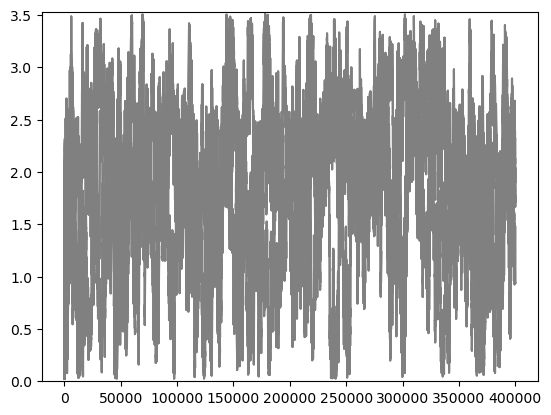

0.25

In [142]:
navg=16
tavg=navg*DT
print(f"{tavg=} ms")
ymax=0
for minR_lst in minR_lst_lst:
    y=moving_average(minR_lst,navg)
    plt.plot(y,color='gray')
    if ymax<np.max(minR_lst):
        ymax=np.max(minR_lst)
plt.ylim([0,ymax])
plt.show()
DT

In [143]:
#DONE: remake the forloop starting from the end and working backwords
#MOTIVATION: so i don't have to track every nonexample for very long

In [144]:
# #compute the minimum initial range to another tip
# dist_values=np.zeros(numparticles)

In [145]:
# #compute the minimum initial range to another tip
# dist_values=np.zeros(numparticles)
# xy_self=d_next.iloc[index_self][['x','y']].values
# for index_other in index_other_values:
#     xy_other=d_next.iloc[index_other][['x','y']].values
#     dist=distance_L2_pbc(xy_self,xy_other)
#     dist_values[index_other]=dist
# minR = dist_values[dist_values>0].min()

In [146]:
dirout = os.path.join(folder,f"../min_range_list.npz")
print (f"{dirout=}")

dirout='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/neighbors_False_uniformic_0_fc_2_r_0.314_D_0.42_L_5_kappa_75_varkappa_9.3_N_4/Log/../min_range_list.npz'


In [147]:
np.savez_compressed(dirout,*minR_lst_lst)

# compute F_LPM for both fits to full models

In [176]:
# #LPM fit to FK
# dirout='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/neighbors_False_uniformic_0_fc_2_r_0.457_D_0.115_L_5_kappa_15_varkappa_1.552_N_8/Log/../min_range_list.npz'
# # r = 0.457#±0.009 cm #FK
#LPM fit to LR
dirout='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/neighbors_False_uniformic_0_fc_2_r_0.314_D_0.42_L_5_kappa_75_varkappa_9.3_N_4/Log/../min_range_list.npz'
# r = 0.314#±0.003 cm #LR
r=0.1
r2=0.15
# r2=0.2
DX=1.
minR_lst_lst = list(np.load(dirout).values())
threshR=r/DX
threshR2=r2/DX

In [177]:
dict_lst=[]
count=0
for minR_lst in minR_lst_lst:
    nobs=len(minR_lst)
    if nobs==0:
        count+=1
    else:
        #trajectory was longer than mindur in duration, consider
        minR = np.min(minR_lst)
        #compute a large number of minR_lst values
        boo_in_range = np.array(minR_lst)<threshR
        ends_in_range = boo_in_range[0]
        leaves_in_range=False
        if ends_in_range:
            #check if trajectory leaves in_range status
            i0=np.argwhere(boo_in_range)[0][0]
            if i0<(nobs-1): 
                leaves_in_range = boo_in_range[i0:].all()
        #check if it really leaves the outer range at any point
        if leaves_in_range:
            boo_in_range2 = np.array(minR_lst)<threshR2
            booir=boo_in_range2[i0:]
            if booir.all():
                #then the pair never leaves the outer range, disregard
                leaves_in_range=False

        #record
        dict_lst.append(dict(
            minR=minR,nobs=nobs,
            ends_in_range=ends_in_range,
            leaves_in_range=leaves_in_range,
        ))
print(f"{count} entries had zero observations")
len(dict_lst)
df=pd.DataFrame(dict_lst)
# df.head()

0 entries had zero observations


In [178]:
# identify sum1 out of sum2 trajectories that enter range r stay in range r
sum1=df['leaves_in_range'].sum()
sum2=df['ends_in_range'].sum()
# record F_
# F_LPM = 1-sum1/sum2
F_LPM = sum1/sum2
print(f"{sum1} out of {sum2} trajectories left range {r=} cm ({F_LPM=:.4%})")

0 out of 208 trajectories left range r=0.1 cm (F_LPM=0.0000%)


In [179]:
#LPM fit to FK
dirout='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/neighbors_False_uniformic_0_fc_2_r_0.457_D_0.115_L_5_kappa_15_varkappa_1.552_N_8/Log/../min_range_list.npz'
# r = 0.457#±0.009 cm #FK
# #LPM fit to LR
# dirout='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/neighbors_False_uniformic_0_fc_2_r_0.314_D_0.42_L_5_kappa_75_varkappa_9.3_N_4/Log/../min_range_list.npz'
# r = 0.314#±0.003 cm #LR
# r = 0.1#±0.009 cm #FK
DX=1.
minR_lst_lst = list(np.load(dirout).values())
# threshR=r/DX

In [180]:
dict_lst=[]
count=0
for minR_lst in minR_lst_lst:
    nobs=len(minR_lst)
    if nobs==0:
        count+=1
    else:
        #trajectory was longer than mindur in duration, consider
        minR = np.min(minR_lst)
        #compute a large number of minR_lst values
        boo_in_range = np.array(minR_lst)<threshR
        ends_in_range = boo_in_range[0]
        leaves_in_range=False
        if ends_in_range:
            #check if trajectory leaves in_range status
            i0=np.argwhere(boo_in_range)[0][0]
            if i0<(nobs-1): 
                leaves_in_range = boo_in_range[i0:].all()
        #check if it really leaves the outer range at any point
        if leaves_in_range:
            boo_in_range2 = np.array(minR_lst)<threshR2
            booir=boo_in_range2[i0:]
            if booir.all():
                #then the pair never leaves the outer range, disregard
                leaves_in_range=False

        #record
        dict_lst.append(dict(
            minR=minR,nobs=nobs,
            ends_in_range=ends_in_range,
            leaves_in_range=leaves_in_range,
        ))
print(f"{count} entries had zero observations")
len(dict_lst)
df=pd.DataFrame(dict_lst)
# df.head()

0 entries had zero observations


In [181]:
# identify sum1 out of sum2 trajectories that enter range r stay in range r
sum1=df['leaves_in_range'].sum()
sum2=df['ends_in_range'].sum()
# record F_
# F_LPM = 1-sum1/sum2
F_LPM = sum1/sum2
print(f"{sum1} out of {sum2} trajectories left range {r=} cm ({F_LPM=:.4%})")

0 out of 541 trajectories left range r=0.1 cm (F_LPM=0.0000%)


In [174]:
# 4 out of 30 trajectories left range r=0.457 cm (F_LPM=86.6667%)
# 173 out of 1199 trajectories left range r=0.457 cm (F_LPM=85.5713%)



In [175]:
#FK
# 4 out of 541 trajectories left range r=0.1 cm (F_LPM=99.2606%)
#LR
# 0 out of 208 trajectories left range r=0.1 cm (F_LPM=100.0000%)
